# Exploratory Data Analysis Assignment - Zillow Home Research

### Daniel Trovato

This EDA looks at the Zillow Research Dataset - City Time Series data to identify insights in the US housing market. Helpful as I'm currently looking for a home! More info here: "https://www.zillow.com/research/data/" and here: "https://www.kaggle.com/zillow/zecon/home"

In [71]:
#Importing the python packages
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [72]:
#Loading the data
zillowdata = pd.read_csv('data/City_time_series.csv')

In [6]:
#Understanding what data is available and column types
zillowdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762566 entries, 0 to 3762565
Data columns (total 81 columns):
Date                                                             object
RegionName                                                       object
InventorySeasonallyAdjusted_AllHomes                             float64
InventoryRaw_AllHomes                                            float64
MedianListingPricePerSqft_1Bedroom                               float64
MedianListingPricePerSqft_2Bedroom                               float64
MedianListingPricePerSqft_3Bedroom                               float64
MedianListingPricePerSqft_4Bedroom                               float64
MedianListingPricePerSqft_5BedroomOrMore                         float64
MedianListingPricePerSqft_AllHomes                               float64
MedianListingPricePerSqft_CondoCoop                              float64
MedianListingPricePerSqft_DuplexTriplex                          float64
MedianListing

In [34]:
#Understanding ranges and aggregations across the column types
zillowdata.describe()

,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,MedianListingPricePerSqft_CondoCoop,MedianListingPricePerSqft_DuplexTriplex,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
count,771744.000000,771744.000000,7670.000000,74574.000000,250633.000000,144183.000000,37653.000000,551975.000000,54821.000000,7584.000000,...,2.599397e+06,8.235740e+05,3.077548e+06,3.075331e+06,3.115759e+06,1.098167e+06,1.100850e+06,1.009397e+06,450219.000000,1.098919e+06
mean,163.438201,163.469371,260.912038,167.764079,145.076803,154.369271,193.162108,151.277372,207.499579,102.725920,...,1.445351e+05,1.826798e+05,1.898498e+05,1.967398e+05,2.802083e+05,1.402930e+03,1.391671e+03,9.108979e-01,1322.360111,1.424704e+03
std,451.979813,452.845056,169.798120,118.391115,93.495189,98.637567,163.339295,100.278583,139.111165,98.811634,...,1.271271e+05,1.233000e+05,1.791446e+05,1.969876e+05,2.974863e+05,7.509482e+02,7.282890e+02,3.361167e-01,528.027246,8.083801e+02
min,3.000000,2.000000,26.422764,18.564356,19.561061,20.084340,13.507109,20.293026,33.783784,13.849547,...,1.620000e+04,2.650000e+04,1.660000e+04,1.660000e+04,2.390000e+04,4.700000e+02,4.700000e+02,3.440000e-01,465.000000,4.700000e+02
25%,37.000000,37.000000,152.631579,95.744681,93.259047,100.187527,104.269883,93.436666,119.265026,46.080614,...,7.500000e+04,1.076000e+05,9.930000e+04,9.990000e+04,1.458000e+05,9.970000e+02,9.930000e+02,6.980000e-01,963.000000,9.970000e+02
50%,72.000000,72.000000,211.220755,133.341651,120.592248,126.864068,140.528604,124.423276,165.359396,73.041174,...,1.109000e+05,1.471000e+05,1.426000e+05,1.444000e+05,2.068000e+05,1.227000e+03,1.222000e+03,8.320000e-01,1220.000000,1.231000e+03
75%,154.000000,154.000000,326.499714,195.039238,163.556465,171.834625,217.749529,172.413793,255.524154,123.478987,...,1.671000e+05,2.174000e+05,2.180000e+05,2.236000e+05,3.132000e+05,1.555000e+03,1.545000e+03,1.020000e+00,1529.000000,1.574000e+03
max,29395.000000,30031.000000,1129.518072,1313.762626,2071.403891,1374.562848,1427.267987,1789.677944,1574.360127,827.887713,...,4.136400e+06,1.953300e+06,7.257800e+06,7.264100e+06,1.298030e+07,2.332500e+04,2.284600e+04,6.496000e+00,15852.000000,2.301400e+04


In [52]:
#To looks at aggregated statistics across a given date range - 2017
zillowdata2017 = zillowdata.groupby('Date').sum()['2017-01-01':'2017-12-31']

In [49]:
#What was the highest selling day in 2017
zillowdata2017['Sale_Prices'].describe()

count    1.200000e+01
mean     5.879963e+08
std      9.530158e+07
min      2.892245e+08
25%      6.101814e+08
50%      6.196596e+08
75%      6.237288e+08
max      6.256290e+08
Name: Sale_Prices, dtype: float64

In [7]:
# Which cities had the most sales of all time?
zillowdata.groupby('RegionName')['RegionName', 'Sale_Counts'].sum().nlargest(5, 'Sale_Counts')

,Sale_Counts
RegionName,
chicagocookil,334484.0
phoenixmaricopaaz,319316.0
las_vegasclarknv,312616.0
new_yorkqueensny,309052.0
los_angeleslos_angelesca,274907.0


In [63]:
# Which cities had the most sales in 2017?
zillowdata2017Regions = zillowdata[zillowdata.Date.str.contains('2017')].groupby('RegionName')['RegionName','Sale_Counts'].sum()
zillowdata2017Regions.nlargest(5,'Sale_Counts')

,Sale_Counts
RegionName,
new_yorkqueensny,46681.0
chicagocookil,39065.0
phoenixmaricopaaz,34460.0
las_vegasclarknv,33386.0
los_angeleslos_angelesca,31450.0


In [8]:
# Which cities had the highest sales value of all time?
zillowdata.groupby('RegionName')['RegionName', 'Sale_Prices'].sum().nlargest(5, 'Sale_Prices')

,Sale_Prices
RegionName,
los_altossanta_claraca,209776400.0
saratogasanta_claraca,185892600.0
newport_beachorangeca,158783500.0
burlingamesan_mateoca,158401300.0
laguna_beachorangeca,151380500.0


In [65]:
#What were the top regions in New York and their total sale prices
NYdata = zillowdata[zillowdata.RegionName.str.contains('new_york')]
NYdata.groupby('RegionName')['RegionName', 'Sale_Prices'].sum().nlargest(5, 'Sale_Prices')

,Sale_Prices
RegionName,
new_yorkqueensny,42655500.0
new_york_millsoneidany,0.0
new_york_millsotter_tailmn,0.0
west_new_yorkhudsonnj,0.0


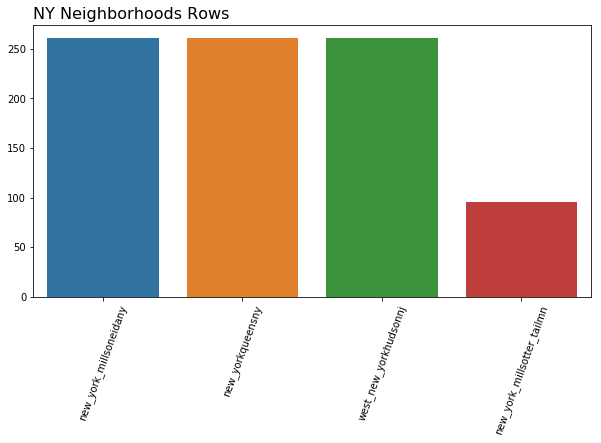

In [66]:
# How many rows are there per New York neighborhood?
plt.figure(figsize = (10, 5))
sns.countplot(NYdata.RegionName)
plt.xticks(rotation = 70)
plt.xlabel('')
plt.ylabel('')
plt.title('NY Neighborhoods Rows', loc = 'left', fontsize = 16);

In [ ]:
#Open Question - is the city breakdown complete?  Millsotter has less rows than others

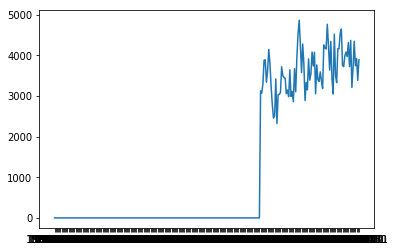

In [25]:
# What is the trend of Sales Data in Queens, NY
QueensData = zillowdata[zillowdata.RegionName.str.contains('new_yorkqueensny')].groupby('Date')['Date','Sale_Counts'].sum()
plt.plot(QueensData)

In [ ]:
#Looks like the Queens Sales Count Data was only live for less than half the time series record

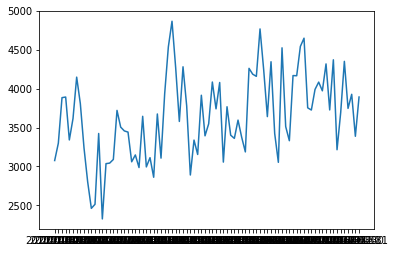

In [28]:
QueensData2011_2017 = QueensData['2011-01-01':'2017-12-31']
plt.plot(QueensData2011_2017)

In [ ]:
#In terms of number of Sales, properties in Queens have stayed between 2500 and 5000 / month for the past 7 years

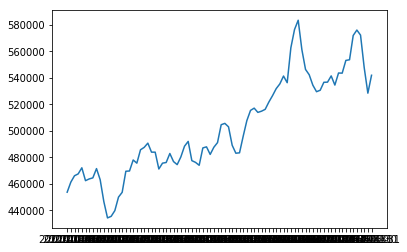

In [29]:
#But how about average home prices.  How have average property values trending over the past 7 years
QueensDataSales = zillowdata[zillowdata.RegionName.str.contains('new_yorkqueensny')].groupby('Date')['Date','Sale_Prices'].mean()
QueensDataSales2011_2017 = QueensDataSales['2011-01-01':'2017-12-31']
plt.plot(QueensDataSales2011_2017)

In [67]:
#Since 2012, the average property value in Queens has risen from $460k to around $540k